# SQL Data Analysis: European Soccer Data

In this small project, we want to do a data analysis on the European Soccer dataset using SQL queries processed through Python 3. My motivation for this project is to gain a better understanding of how to query data with SQL and improve my Python data analysis skill.

Firstly, we import libraries that are essential for this study.

In [74]:
# Import libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Input data files path
path = "data/" 
database = path + 'database.sqlite'

## 1. Data Exploration
First we will create a connection to the database, and explore the tables in the data.

In [54]:
# Establish a connection

conn = sqlite3.connect(database)

# Explore which tables exist in the data

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


Now, we furtherly explore the tables.

In [55]:
# Extracting the tables into variables

player_attributes = pd.read_sql("""SELECT * FROM Player_Attributes;""", conn)
player = pd.read_sql("""SELECT * FROM Player;""", conn)
match = pd.read_sql("""SELECT * FROM Match;""", conn)
league = pd.read_sql("""SELECT * FROM League;""", conn)
country = pd.read_sql("""SELECT * FROM Country;""", conn)
team = pd.read_sql("""SELECT * FROM Team;""", conn)
team_attributes = pd.read_sql("""SELECT * FROM Team_Attributes""", conn)

Next, we take a glimpse at each table.

In [56]:
player_attributes.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [57]:
player.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [58]:
match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [59]:
league.head(1)

,id,country_id,name
0,1,1,Belgium Jupiler League


In [60]:
country.head(1)

,id,name
0,1,Belgium


In [61]:
team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN


In [62]:
team_attributes.head(1)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


We can see that the dataset contains the following tables:
* **Country**: It contains the list of countries where the games are played and their unique ids.
* **League**: It contains the specific titles of the sports events/league matches.
* **Match**: It contains performance metrics of various players for different league matches. The information is specified using the unique ids of the other three tables: Country, League, and Team.
* **Player**: It has Players’ names, height, weight, birth date, FIFA ID, and API ID.
* **Player_Attributes**: It has various parameters like rating, possible score, best foot, etc., for each player to highlight their overall performance.
* **Team**: It contains teams’ names (short and long), and their IDs for API and FIFA.
* **Team_Attributes**: It contains various columns that reflect each team’s performance.
Next, we will try to query the detail matches data using JOINs.

### List of matches

Write a query to return a table contains the following columns: Match ID, country_name, league_name, season, stage, date, home_team, away_team, home_team_goal, away_team_goal.

In [63]:
matches_data = pd.read_sql(
    """
    SELECT
        Match.id,
        Country.name AS country_name,
        League.name AS league_name,
        season,
        stage,
        date,
        home.team_long_name AS home_team,
        away.team_long_name AS away_team,
        home_team_goal,
        away_team_goal
    FROM
        Match
    JOIN Country ON Country.id = Match.country_id
    JOIN League ON League.id = Match.league_id
    LEFT JOIN Team AS home ON home.team_api_id = Match.home_team_api_id
    LEFT JOIN Team as away ON away.team_api_id = Match.away_team_api_id
    ORDER BY date
    LIMIT 10;
    """, conn
)
matches_data

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0
5,24614,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,AC Bellinzona,Neuchâtel Xamax,1,2
6,24615,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Zürich,FC Luzern,1,0
7,24616,Switzerland,Switzerland Super League,2008/2009,2,2008-07-24 00:00:00,FC Sion,BSC Young Boys,2,1
8,24617,Switzerland,Switzerland Super League,2008/2009,2,2008-07-24 00:00:00,FC Vaduz,FC Aarau,0,2
9,24668,Switzerland,Switzerland Super League,2008/2009,3,2008-07-26 00:00:00,FC Basel,AC Bellinzona,2,0


## 2. Basic Data Aggregations

As far as we are concerned, five European countries that have strong soccer scenes with prestigious clubs are France, Spain, Germany, England and Italy.

Hence, we Write a query that summarize the leagues data (with number of stages more than 10) of those countries, which includes:
* Country and league names
* Season
* Count the number of stages and teams
* The averages of team scores, goals
* Total number of goals

Data should be grouped and ordered by country name, league name and season and ordered by, descendingly.

In [64]:
leagues_data = pd.read_sql(
    """
    SELECT
        Country.name AS country_name,
        League.name AS league_name,
        season,
        COUNT(DISTINCT stage) AS number_of_stage,
        COUNT(DISTINCT home.team_long_name) AS number_of_team,
        AVG(home_team_goal) AS avg_home_team_score,
        AVG(away_team_goal) AS avg_away_team_score,
        SUM(home_team_goal + away_team_goal) AS total_goals
    FROM
        Match
    JOIN Country ON Country.id = Match.country_id
    JOIN League ON League.id = Match.league_id
    LEFT JOIN Team AS home ON home.team_api_id = Match.home_team_api_id
    LEFT JOIN Team AS away ON away.team_api_id = Match.away_team_api_id
    WHERE country_name IN ("France", "Italy", "Germany", "Spain", "England")
    GROUP BY
        country_name, league_name, season
    HAVING
        number_of_stage > 10
    ORDER BY
        country_name, league_name, season DESC;
    """, conn
)
leagues_data

,country_name,league_name,season,number_of_stage,number_of_team,avg_home_team_score,avg_away_team_score,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,947


We want to plot the data of average home and away team score and total goals against season. However, we must first reshape the dataframe from long to wide.

In [65]:
# Reshape the dataframe from long to wide

# Average home team score vs season

df_avg_home_score = pd.DataFrame(index = np.sort(leagues_data.season.unique()), columns=leagues_data.country_name.unique())
df_avg_home_score.loc[:, 'England'] = list(leagues_data.loc[leagues_data['country_name'] == 'England', 'avg_home_team_score'])
df_avg_home_score.loc[:, 'France'] = list(leagues_data.loc[leagues_data['country_name'] == 'France', 'avg_home_team_score'])
df_avg_home_score.loc[:, 'Germany'] = list(leagues_data.loc[leagues_data['country_name'] == 'Germany', 'avg_home_team_score'])
df_avg_home_score.loc[:, 'Italy'] = list(leagues_data.loc[leagues_data['country_name'] == 'Italy', 'avg_home_team_score'])
df_avg_home_score.loc[:, 'Spain'] = list(leagues_data.loc[leagues_data['country_name'] == 'Spain', 'avg_home_team_score'])

# Average away team score vs season

df_avg_away_score = pd.DataFrame(index = np.sort(leagues_data.season.unique()), columns=leagues_data.country_name.unique())
df_avg_away_score.loc[:, 'England'] = list(leagues_data.loc[leagues_data['country_name'] == 'England', 'avg_away_team_score'])
df_avg_away_score.loc[:, 'France'] = list(leagues_data.loc[leagues_data['country_name'] == 'France', 'avg_away_team_score'])
df_avg_away_score.loc[:, 'Germany'] = list(leagues_data.loc[leagues_data['country_name'] == 'Germany', 'avg_away_team_score'])
df_avg_away_score.loc[:, 'Italy'] = list(leagues_data.loc[leagues_data['country_name'] == 'Italy', 'avg_away_team_score'])
df_avg_away_score.loc[:, 'Spain'] = list(leagues_data.loc[leagues_data['country_name'] == 'Spain', 'avg_away_team_score'])

# Total goals vs season

df_total_goals = pd.DataFrame(index = np.sort(leagues_data.season.unique()), columns=leagues_data.country_name.unique())
df_total_goals.loc[:, 'England'] = list(leagues_data.loc[leagues_data['country_name'] == 'England', 'total_goals'])
df_total_goals.loc[:, 'France'] = list(leagues_data.loc[leagues_data['country_name'] == 'France', 'total_goals'])
df_total_goals.loc[:, 'Germany'] = list(leagues_data.loc[leagues_data['country_name'] == 'Germany', 'total_goals'])
df_total_goals.loc[:, 'Italy'] = list(leagues_data.loc[leagues_data['country_name'] == 'Italy', 'total_goals'])
df_total_goals.loc[:, 'Spain'] = list(leagues_data.loc[leagues_data['country_name'] == 'Spain', 'total_goals'])

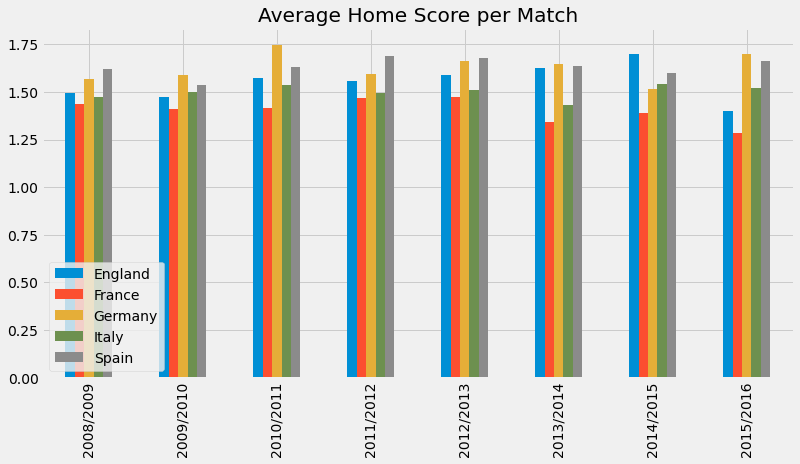

In [102]:
# Plot the average home team score vs time

df_avg_home_score.plot(figsize=(12,6), kind = 'bar', title='Average Home Score per Match').legend(loc = 'lower left')

For four seasons, home teams in German leagues scored the most goals on average. Home teams in Spanish leagues scored the most goals on average in three seasons. On the other hand, home teams in French leagues scored the least goals on average in all seasons.

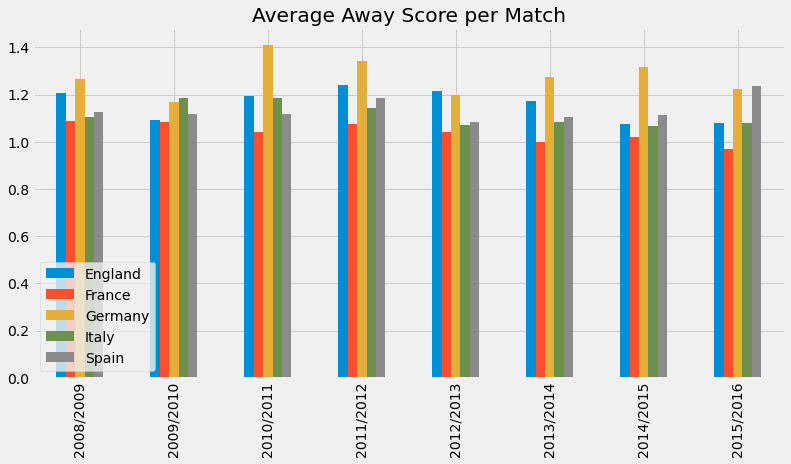

In [103]:
# Plot the average away team score vs time

df_avg_away_score.plot(figsize=(12,6), kind = 'bar', title='Average Away Score per Match').legend(loc = 'lower left')

Meanwhile, opponent teams in German leagues also scored the most goals on average in most seasons (five). On the other hand, opponent teams in French leagues also scored the least goals on average in all seasons.

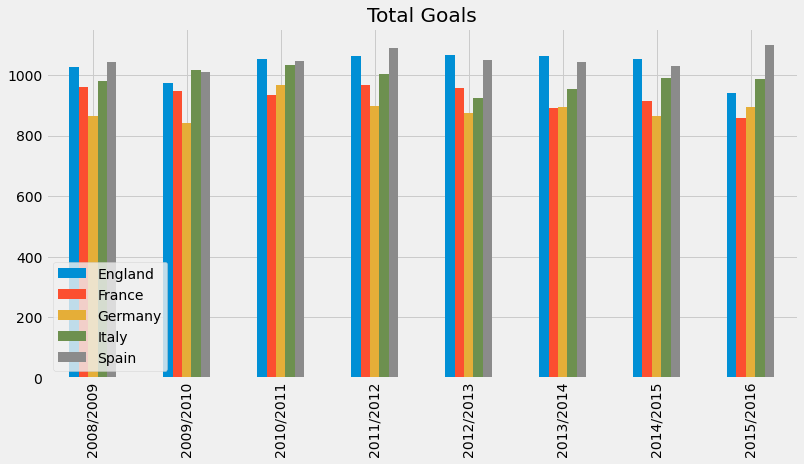

In [105]:
# Plot the average away team score vs time

df_total_goals.plot(figsize=(12,6), kind = 'bar', title='Total Goals').legend(loc='lower left')

The English leagues have the most total goals scored in four seasons (2010/2011, 2012/2013, 2013/2014 and 2014/2015). Spanish leagues follow closely with three seasons (2008/2009, 2011/2012 and 2015/2016). Meanwhile, German leagues has the least total goals in five seasons (2008/2009, 2009/2010, 2011/2012, 2012/2013 and 2014/2015).

### Using Subqueries
Write a query to return a match result table which includes:
* Country name, League name, season, stage
* Match date, number of goals scored by both teams, total goals in the match
* Names of home and opponent teams
* A match result column based on the team scores

In [120]:
match_result = pd.read_sql("""
    SELECT  
        S.country_name, 
        S.league_name, 
        S.season,
        S.stage,
        S.result,
        S.comment,
        S.match_date,
        S.home_team_goal,
        S.away_team_goal,
        S.home_team_goal + S.away_team_goal AS total_goals,
        home.team_long_name AS home_team,
        away.team_long_name AS away_team
    FROM 
    (
        SELECT  
            M.*,
            DATE(M.date) as match_date,
            CASE 
                WHEN M.home_team_goal = M.away_team_goal THEN 'DRAW'
                WHEN M.home_team_goal > M.away_team_goal THEN 'HOME TEAM WINS'
                WHEN M.home_team_goal < M.away_team_goal THEN 'AWAY TEAM WINS'
            END AS result,
            CASE
                WHEN abs(home_team_goal - away_team_goal) >= 3 THEN 'An amazing victory!'
                WHEN abs(home_team_goal - away_team_goal) = 2 THEN 'A convincing win'
                WHEN abs(home_team_goal - away_team_goal) = 1 THEN 'A minimal victory'
                WHEN (home_team_goal = away_team_goal) and home_team_goal > 0 THEN 'A draw with goals'
                ELSE 'A draw without goals'
            END AS comment,
            League.name as league_name,
            Country.name as country_name
        FROM Match AS M
        JOIN League
            ON M.country_id = League.country_id
        JOIN Country
            ON M.country_id = Country.id
    ) as S
    LEFT JOIN Team as home
        ON S.home_team_api_id = home.team_api_id
    LEFT JOIN Team as away
        ON S.away_team_api_id = away.team_api_id
    ORDER BY match_date DESC;""", conn)
                                    
match_result.head()

,country_name,league_name,season,stage,result,comment,match_date,home_team_goal,away_team_goal,total_goals,home_team,away_team
0,Switzerland,Switzerland Super League,2015/2016,36,AWAY TEAM WINS,A minimal victory,2016-05-25,0,1,1,FC Basel,Grasshopper Club Zürich
1,Switzerland,Switzerland Super League,2015/2016,36,HOME TEAM WINS,An amazing victory!,2016-05-25,3,0,3,Lugano,FC St. Gallen
2,Switzerland,Switzerland Super League,2015/2016,36,DRAW,A draw with goals,2016-05-25,2,2,4,FC Luzern,FC Sion
3,Switzerland,Switzerland Super League,2015/2016,36,AWAY TEAM WINS,An amazing victory!,2016-05-25,0,3,3,FC Thun,BSC Young Boys
4,Switzerland,Switzerland Super League,2015/2016,36,HOME TEAM WINS,A convincing win,2016-05-25,3,1,4,FC Zürich,FC Vaduz


Write a query to return the top 10 (in terms of total goals) of the Bundesliga (German league) in season 2015/2016.

In [124]:
bundesliga_top10 = pd.read_sql("""
    SELECT  
        S.country_name, 
        S.league_name, 
        S.season,
        S.stage,
        S.result,
        S.comment,
        S.match_date,
        S.home_team_goal,
        S.away_team_goal,
        S.home_team_goal + S.away_team_goal AS total_goals,
        home.team_long_name AS home_team,
        away.team_long_name AS away_team
    FROM 
    (
        SELECT  
            M.*,
            DATE(M.date) as match_date,
            CASE 
                WHEN M.home_team_goal = M.away_team_goal THEN 'DRAW'
                WHEN M.home_team_goal > M.away_team_goal THEN 'HOME TEAM WINS'
                WHEN M.home_team_goal < M.away_team_goal THEN 'AWAY TEAM WINS'
            END AS result,
            CASE
                WHEN abs(home_team_goal - away_team_goal) >= 3 THEN 'An amazing victory!'
                WHEN abs(home_team_goal - away_team_goal) = 2 THEN 'A convincing win'
                WHEN abs(home_team_goal - away_team_goal) = 1 THEN 'A minimal victory'
                WHEN (home_team_goal = away_team_goal) and home_team_goal > 0 THEN 'A draw with goals'
                ELSE 'A draw without goals'
            END AS comment,
            League.name as league_name,
            Country.name as country_name
        FROM Match AS M
        JOIN League
            ON M.country_id = League.country_id
        JOIN Country
            ON M.country_id = Country.id
        WHERE
            M.season = '2015/2016' AND Country.name = 'Germany'
    ) as S
    LEFT JOIN Team as home
        ON S.home_team_api_id = home.team_api_id
    LEFT JOIN Team as away
        ON S.away_team_api_id = away.team_api_id
    ORDER BY total_goals DESC
    LIMIT 10;""", conn)
                                    
bundesliga_top10

,country_name,league_name,season,stage,result,comment,match_date,home_team_goal,away_team_goal,total_goals,home_team,away_team
0,Germany,Germany 1. Bundesliga,2015/2016,32,HOME TEAM WINS,An amazing victory!,2016-05-02,6,2,8,SV Werder Bremen,VfB Stuttgart
1,Germany,Germany 1. Bundesliga,2015/2016,4,HOME TEAM WINS,An amazing victory!,2015-09-12,6,2,8,Eintracht Frankfurt,1. FC Köln
2,Germany,Germany 1. Bundesliga,2015/2016,10,HOME TEAM WINS,A minimal victory,2015-10-24,4,3,7,Bayer 04 Leverkusen,VfB Stuttgart
3,Germany,Germany 1. Bundesliga,2015/2016,10,HOME TEAM WINS,An amazing victory!,2015-10-25,5,1,6,Borussia Dortmund,FC Augsburg
4,Germany,Germany 1. Bundesliga,2015/2016,11,DRAW,A draw with goals,2015-10-31,3,3,6,FC Augsburg,1. FSV Mainz 05
5,Germany,Germany 1. Bundesliga,2015/2016,13,HOME TEAM WINS,An amazing victory!,2015-11-21,6,0,6,VfL Wolfsburg,SV Werder Bremen
6,Germany,Germany 1. Bundesliga,2015/2016,14,DRAW,A draw with goals,2015-11-28,3,3,6,TSG 1899 Hoffenheim,Borussia Mönchengladbach
7,Germany,Germany 1. Bundesliga,2015/2016,19,DRAW,A draw with goals,2016-01-30,3,3,6,SV Werder Bremen,Hertha BSC Berlin
8,Germany,Germany 1. Bundesliga,2015/2016,20,HOME TEAM WINS,An amazing victory!,2016-02-05,5,1,6,Borussia Mönchengladbach,SV Werder Bremen
9,Germany,Germany 1. Bundesliga,2015/2016,20,AWAY TEAM WINS,A convincing win,2016-02-06,2,4,6,Eintracht Frankfurt,VfB Stuttgart
